# Question 1:

In [22]:
# 1.1: Load data (Successful)

# Import pandas to read data
import pandas as pd

# Read the data using pd.read_csv() with relative path, keep high precision
df=pd.read_csv("./input_data.csv", header=None, float_precision='round_trip')

# row is 2207, col is 459
print(df.shape) # returned (2207, 459)

(2207, 459)


In [28]:
# 1.1 Continue (data wrangling)

print(df.isna().values.sum()) # returned 0, meaning no missing data

# Handling constant rows
constant_df=df[df.nunique(axis=1)==1]
df.drop(constant_df.index, inplace=True)
print(df.shape) # return (1806, 459)


# Transpose it such that every row is the vector, with columns corresponding to entries in the vector.
std_df=df.T
print(std_df.shape) # returned (459, 1806), transpose is successful

# Perform range standardization through elementwise functions (y_ij): (reuse my own code for asignment 3)
# use for loop to, where i is the column, j is values at new_df[col]
# using skelearn.preprocessing.StandardScaler also works
for col in std_df.columns:
    std_df[col]=(std_df[col]-std_df[col].min())/(std_df[col].max()-std_df[col].min())

# print("The range standardized features y_ij are:\n")
# print(std_df)



0
(1806, 459)
(459, 1806)
The range standardized features y_ij are:

         0         1         3         4         5         6         7     \
0    0.048734  0.156177  0.504464  0.393617  0.500000  0.563830  0.518519   
1    0.111323  0.074072  0.571429  0.606383  0.560976  0.457447  0.547758   
2    0.064023  0.080148  0.473214  0.489362  0.451220  0.446809  0.612086   
3    0.058767  0.131366  0.410714  0.414894  0.390244  0.425532  0.619883   
4    0.050645  0.147004  0.446429  0.489362  0.439024  0.382979  0.495127   
..        ...       ...       ...       ...       ...       ...       ...   
454  0.051601  0.011640  0.633929  0.457447  0.695122  0.638298  0.341131   
455  0.079790  0.016578  0.562500  0.521277  0.609756  0.478723  0.483431   
456  0.073101  0.002414  0.696429  0.542553  0.658537  0.734043  0.573099   
457  0.056856  0.033637  0.919643  0.776596  0.914634  0.797872  0.557505   
458  0.041567  0.029390  0.678571  0.595745  0.682927  0.627660  0.549708   

      

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

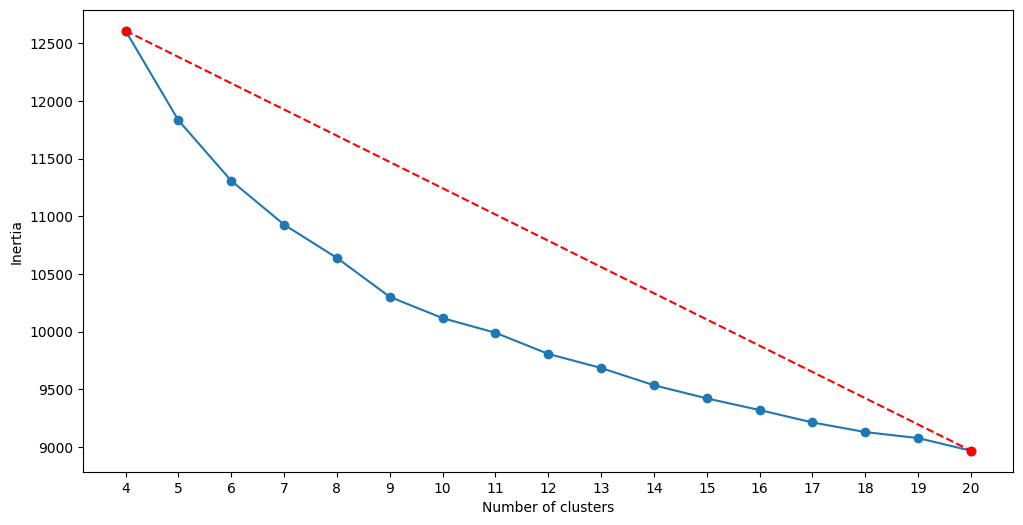

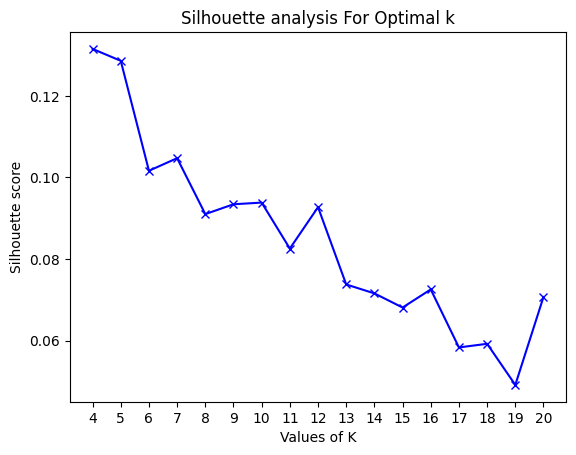

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertria for 4-means clustering is: 

12616.109162135457
[1 1 1 1 1 3 3 1 3 2 1 1 1 1 0 1 1 1 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 2 0 0 0 1 1 1 1 2 0 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2
 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 3 3 2 0 2 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 1 3 3 1 1 3 1 0 1 1 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 2 2 2 2 2 0 0 0 1 0 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 3 1 0 1 1 0 1 1 1 1 2 1 1 0 1 1 1 0 0 3
 0 0 0 0 0 2 0 0 0 0 1 0 1 1 1 2 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [60]:
# 1.2: Perform K-means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# EXTRA: determine how to do get the best # cluster using elbow and Silhoutette

# Finding optimal number of clusters
range_clusters=np.arange(4,21)

# use for loop to  run different K-means model with different numbers of cluster, find the inertia and silhouette coefficient
# Inertia is the sum of distances of samples to their cloeses cluster center
# Silhouette coefficient silhouette score: measures of how similar a data point is within cluster compared to other clusters)
SSE_list=[]
silhouette_avg = []

for num_cluster in range_clusters:
    kmeans = KMeans(n_clusters = num_cluster, init='k-means++')
    kmeans.fit(std_df)
    # Append the metrics to lists
    SSE_list.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(std_df, kmeans.labels_))

# Finding the inertia that has the longest distance from the line drawn from the first point to the last point
frame = pd.DataFrame({'Cluster':range_clusters, 'SSE':SSE_list})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(range_clusters)
plt.ylabel('Inertia')
plt.plot([4,20], [SSE_list[0], SSE_list[-1]], 'bo',linestyle="--", color='red')
plt.show()
# Interpretation is 4, confirm with silhouette analysis

# Silhoutette Analysis
plt.plot(range_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.xticks(range_clusters)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Since 4 has the maximum silhouette score, the optimal k of 4 is verified

# Perform K-means clustering (actually)
kmeans=KMeans(n_clusters=4)
# fit the k-means model
kmeans.fit(std_df)

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("The inertria for 4-means clustering is: \n")
print(kmeans.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print(kmeans.labels_) # returned an array that shows which cluster each observation is in


In [96]:
# 1.3 generate a n(459)*n(459) matrix, denoted M

# if  i and j are same cluster--> 1 else 0
M=np.zeros((std_df.shape[0], std_df.shape[0]))
print(M.shape) # returned (459, 459)

# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels
for i in range(459):
    if i==0:
        m=kmeans.labels_
    else:
        m=np.vstack((m, kmeans.labels_))

print(m.shape)

# Unsure (NEED CHECK)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if m[i][j]==m[j][i]:
            M[i][j]=1

print(M)


(459, 459)
(459, 459)
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [116]:
# 1.4 PCA

# import PCA from sklearn library in python
from sklearn.decomposition import PCA

print(std_df.shape) # 459*1806

# for loop (TEST)
# for i in range(std_df.shape[0]):
#     pca=PCA(n_components=3)
#     pca_fit=pca.fit(std_df[i])

#     print(pca_fit.components_)
#     print(pca_fit.n_features_)  

pca=PCA(n_components=3) # with n_components=3
pca_fit=pca.fit(std_df)

print(pca_fit.components_)
print(pca_fit.components_.shape) # return (3, 1806)
print(pca_fit.n_features_)

(459, 1806)
[[-0.00046754  0.00046142  0.0104082  ... -0.02287424 -0.02411326
   0.01614919]
 [-0.00096959 -0.03808585  0.06528823 ...  0.01323939 -0.04652938
  -0.03918041]
 [-0.00454576 -0.02454373  0.02926165 ... -0.03512294 -0.03080467
   0.00665423]]
(3, 1806)
1806


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
